In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 32

train_path = 'C:/Users/Lenovo/Downloads/flowerNET/divided_dataset/train'
valid_path = 'C:/Users/Lenovo/Downloads/flowerNET/divided_dataset/val'
test_path = 'C:/Users/Lenovo/Downloads/flowerNET/divided_dataset/test'

# useful for getting number of classes
folders = glob('C:/Users/Lenovo/Downloads/flowerNET/divided_dataset/train/*')
len(folders)

0

In [3]:
# add preprocessing layer to the front of VGG

VGG16 = VGG16(weights="imagenet", include_top=False, input_shape=IMAGE_SIZE + [3])
# don't train existing weights
for layer in VGG16.layers:
  layer.trainable = False


# our layers - you can add more if you want
x = Flatten()(VGG16.output)
x = Dense(1000, activation='relu')(x)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=VGG16.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=0,
                                   vertical_flip=False,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3037 images belonging to 3 classes.
Found 867 images belonging to 3 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=val_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)


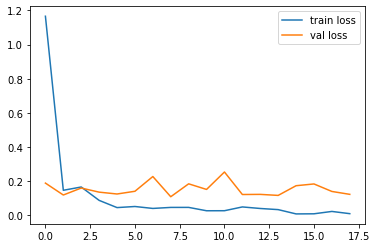

<Figure size 432x288 with 0 Axes>

In [12]:
# ploting val loss and traing loss
sns.set_theme()
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('H:/Shortcuts/Research paper/flowerNET/Augmented/VGG16/LossVal_loss_VGG16.svg')
plt.savefig('H:/Shortcuts/Research paper/flowerNET/Augmented/VGG16/LossVal_loss_VGG16')
plt.show()

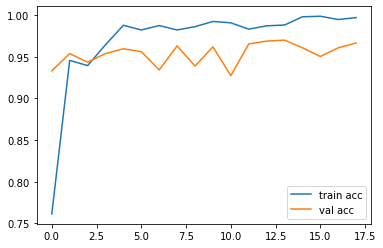

<Figure size 432x288 with 0 Axes>

In [13]:
#plotting val acc and training acc
sns.set_theme()
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('H:/Shortcuts/Research paper/flowerNET/Augmented/VGG16/accuracy_VGG16.svg')
plt.savefig('H:/Shortcuts/Research paper/flowerNET/Augmented/VGG16/accuracy_VGG16')
plt.show()

In [14]:
model.save('H:/Shortcuts/Research paper/flowerNET/Augmented/VGG16/VGG16.h5')

In [15]:
train_loss, train_acc = model.evaluate(training_set, steps=16)
val_loss, val_acc = model.evaluate(val_set, steps=16)
print("Traning Loss and traing accurcy: ",train_loss, train_acc )
print("Validation Loss and Validation accurcy: ",val_loss, val_acc )

16/16 [==============================] - 153s 10s/step - loss: 0.1133 - accuracy: 0.9688
Traning Loss and traing accurcy:  0.0019180701347067952 1.0
Validation Loss and Validation accurcy:  0.11325721442699432 0.96875


In [7]:
model = load_model("H:/Shortcuts/Research paper/flowerNET/Augmented/VGG16/New folder/VGG16.h5")

In [11]:
testing_set = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=123,
    shuffle=False,
    image_size=(224,224),
    batch_size=BATCH_SIZE
)

Found 438 files belonging to 3 classes.


In [12]:
class_names = testing_set.class_names
class_names

['Black_Spot', 'Downy_mildew', 'Fresh_Leaf']

In [13]:
# Extracting all test image and corrosponding labels from tesing image
test_label=[]
test_img=[]
for img, label in testing_set:
  #print(label.numpy())
  test_label.append(label.numpy())
  test_img.append(img.numpy())
print("Total batch of test label: ",len(test_label))
print("Total batch of test image: ",len(test_img))

###############################################################################################

# Extracting only all test image  from tesing image batch list
actual_img=[]
for i in range(len(test_img)):
  for i in test_img[i]:
    i = i*(1/255) # we have to rescale the test image as well to feed the model
    actual_img.append(i)

print("Total Number of image: ", len(actual_img))


# Extracting only all test image  labels from tesing image batch list
actual_label=[]
for i in range(len(test_label)):
  for i in test_label[i]:
    actual_label.append(class_names[i])
     
    

print("Total number of image label : ",len(actual_label))

Total batch of test label:  14
Total batch of test image:  14
Total Number of image:  438
Total number of image label :  438


Black_Spot


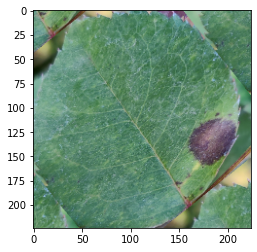

In [14]:
print(actual_label[27])
plt.imshow(actual_img[27])

In [15]:
# make prediction using loaded model
predicted_label=[]
for img in actual_img:
  img_array = tf.expand_dims(img, 0)
  predictions = model.predict(img_array)
  label= class_names[np.argmax(predictions)]
  
  predicted_label.append(label)
 
  

len(predicted_label)

438

In [16]:
# Printing all evaluation matrix
print("Test accuracy: ",accuracy_score(actual_label, predicted_label))
print(classification_report(actual_label, predicted_label))

Test accuracy:  0.9703196347031964
              precision    recall  f1-score   support

  Black_Spot       0.97      0.97      0.97       145
Downy_mildew       1.00      0.98      0.99       149
  Fresh_Leaf       0.95      0.97      0.96       144

    accuracy                           0.97       438
   macro avg       0.97      0.97      0.97       438
weighted avg       0.97      0.97      0.97       438



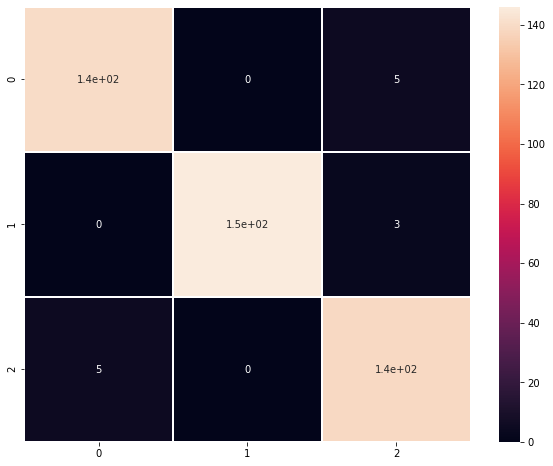

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(actual_label, predicted_label)
import seaborn as sns
ax= plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, linewidth=.5)
plt.plot()
plt.savefig("H:/Shortcuts/Research paper/flowerNET/Augmented/VGG16/confussion_matrix_VGG16.svg")
plt.savefig("H:/Shortcuts/Research paper/flowerNET/Augmented/VGG16/confussion_matrix_VGG16")
plt.show()